In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [ ]:
data = pd.read_excel('datatab.xlsx')
print(data.shape)
data.head()

(36, 4)


,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


In [ ]:
data.isnull().sum()

,0
Disease,0
Age,0
Gender,0
Smoker status,0


In [ ]:
data['Disease'] = data['Disease'].map({'diseased':1,'not diseased':0})
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})
data['Smoker status'] = data['Smoker status'].map({'Smoker':1,'Non-smoker':0})
data.head()

,Disease,Age,Gender,Smoker status
0,1,43,1,1
1,0,18,1,1
2,1,22,0,0
3,1,25,1,0
4,0,45,0,1


In [ ]:
x = data.iloc[:,1:]
x.head()

,Age,Gender,Smoker status
0,43,1,1
1,18,1,1
2,22,0,0
3,25,1,0
4,45,0,1


In [ ]:
y = data.iloc[:,0]
y.head()

,Disease
0,1
1,0
2,1
3,1
4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(28, 3)

(8, 3)

(28,)

(8,)

In [ ]:
model = LogisticRegression(solver='liblinear', max_iter = 1000)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [ ]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100), '%')

Confusion Matrix :  [[2 0]
 [1 5]]
Accuracy Score :  0.875
Accuracy in Percentage :  87 %


<Axes: xlabel='Predicted', ylabel='Actual'>

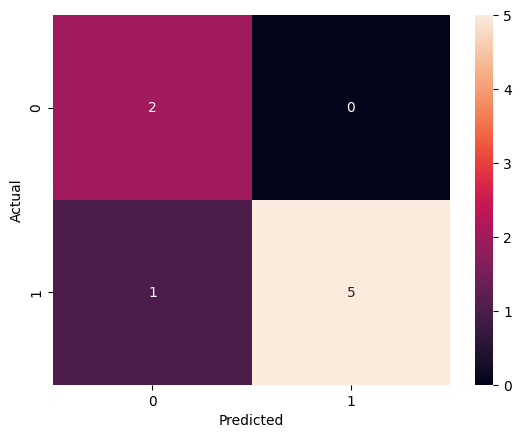

In [ ]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted' ])
sn.heatmap(conf_mat, annot=True)

In [ ]:
total_pred=model.predict(x)
conf_mat=metrics.confusion_matrix(y, total_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y, total_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100), '%')

Confusion Matrix :  [[10  6]
 [ 4 16]]
Accuracy Score :  0.7222222222222222
Accuracy in Percentage :  72 %


<Axes: xlabel='Predicted', ylabel='Actual'>

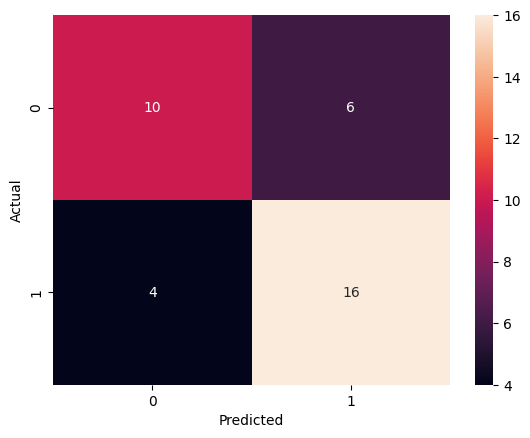

In [ ]:
conf_mat=pd.crosstab(y, total_pred, rownames=['Actual'],colnames=['Predicted' ])
sn.heatmap(conf_mat, annot=True)